In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms as transforms

from torchvision.models import resnet50, ResNet50_Weights

from torch.utils.data import DataLoader
import os
import sklearn.model_selection as model_selection
import sklearn.linear_model as linear_model
import subprocess
from tqdm import tqdm

from sklearn.decomposition import PCA, KernelPCA

from sklearn.neural_network import MLPClassifier

from methods import (
    get_labels,
    ImageHeuristicFeatureExtractor,
    standardize_features,
    ImageDataset,
    merge_features_with_labels,
    not_oversampled_images,
    calculate_test_size,
    plot_confusion_matrix,
    plot_low_dim_components,
)

from data_augmentation import split_data_and_oversample

from sklearn.preprocessing import StandardScaler
from sklearn import svm

from sklearn.manifold import TSNE
import shap

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
import matplotlib.pylab as plt
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.rcParams.update({'font.size': 10})

In [3]:
from sklearn.metrics import ConfusionMatrixDisplay

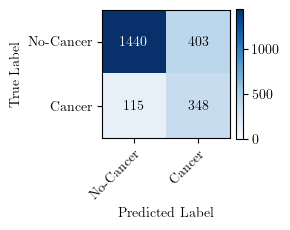

In [77]:
# Data: true_positive, false_negative, false_positive, true_negative
#data = [1707, 481, 23, 95] # LogisticRegression_RestNetFeat_oversample
data = [1242, 622, 81, 361] # LogisticRegression_heuristic feature not-oversampled
data = [1792, 65, 271, 177] # ResNet End-To-End NOT oversampled
data = [1440, 403, 115, 348] # Logistic Regression no Oversample

# Reshape data into a 2x2 matrix
matrix = np.array(data).reshape((2, 2))

# Labels for the axes
labels = ['No-Cancer', 'Cancer']
#labels = ['Positive', 'Negative']

# Create the plot
fig, ax = plt.subplots(figsize=(3, 3))
im = ax.imshow(matrix, interpolation='nearest', cmap='Blues', norm=Normalize(vmin=0, vmax=np.max(matrix)))

# Add the text annotations.
for i in range(2):
    for j in range(2):
        ax.text(j, i, format(matrix[i, j], 'd'),
        ha="center", va="center",
        color="white" if matrix[i, j] > matrix.max() / 2 else "black")

# We want to show all ticks...
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Set labels for axes
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.ax.set_ylabel("", rotation=-90, va="bottom")

# Set a title and show the plot
#ax.set_title('Confusion Matrix')
fig.tight_layout()

path = "/Users/juliansanten/Git/NUS/CancerDetection/figures/"
fig.savefig(path + "Log_cnn_not_oversampled_.pdf")
fig.savefig(path + "Log_cnn_not_oversampled_.png", transparent=True, dpi=600)

In [39]:
res = pd.read_csv("/Users/juliansanten/Git/NUS/CancerDetection/figures/csv.txt")

In [74]:
#plt.style.use('dark_background') # dark_background # default
plt.style.use('default')

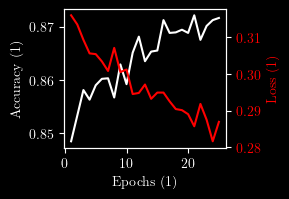

In [69]:
fig = plt.figure(figsize=(2.5*1.2,1.5*1.4))
ax = plt.gca()
ax.plot(res.Epoch, res.Accuracy, label="Accuracy", color="w")
ax.set_ylabel('Accuracy (1)')

ax2 = ax.twinx()
ax2.plot(res.Epoch, res.Loss, label="Accuracy (1)", color="r")
ax2.set_ylabel("Loss (1)", color="r")
ax2.tick_params(axis='y', labelcolor="r")
ax.set_xlabel("Epochs (1)")

fig.tight_layout()
fig.savefig(path + "Resnet_End_to_End_not_oversampled_loss.pdf")
fig.savefig(path + "Resnet_End_to_End_not_oversampled_loss.png", transparent=True, dpi=600)